# Task Description:

Our goal is to train the model to recognize tooth numbers and conditions such as implants, root canals, or crowns in dental X-ray images.
Dataset Overview:
This dataset contains various dental X-ray images showcasing a range of conditions. The images will undergo processing using Instance Segmentation.

Dataset Link: https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril

## Instance Segmentation 


Instance segmentation is a computer vision task that involves identifying and delineating individual objects within an image at the pixel level. In this task, the goal is not only to classify objects and provide bounding boxes around them (as in object detection) but also to segment each instance of an object with high precision, distinguishing between different instances of the same class.

# 1. Import and install Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dentistry-image-dataset/README.dataset.txt
/kaggle/input/dentistry-image-dataset/README.roboflow.txt
/kaggle/input/dentistry-image-dataset/data.yaml
/kaggle/input/dentistry-image-dataset/valid/labels/0000144_png_jpg.rf.aaaeadd7e8a15e69d1ee522095e12a07.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000585_png_jpg.rf.a4359a8475a4702499260d3ba6288e1d.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000314_png_jpg.rf.ee09a69c46a0cb26155e0e3921304145.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000358_png_jpg.rf.2a068aac675532b3649d0009a01e5d0d.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000231_png_jpg.rf.b4455df07a89550468c2ed5332081699.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000567_png_jpg.rf.222e74190014c39ab72202db1bbc44f8.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000494_png_jpg.rf.488250bdb6da9e7da1a2d1cc093e15d4.txt
/kaggle/input/dentistry-image-dataset/valid/labels/0000308_png_jpg.rf.88b0bc35ce301d0fe4

In [4]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/28/76/3f4ba6c345461cbf79fb45828cdc42b15f60b65a3474e35ad6f476d1d4c7/ultralytics-8.0.230-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.6 MB/s eta 0:00:0000:0100:01


In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt 
from PIL import Image

In [6]:
model=YOLO("yolov8n-seg.yaml")
model=YOLO("yolov8n-seg.pt")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.73M/6.73M [00:00<00:00, 82.9MB/s]


In [7]:
import yaml
yaml_path='/kaggle/input/dentistry-image-dataset/data.yaml'
with open(yaml_path,'r') as file:
    yaml_data=yaml.safe_load(file)
    num_classes=str(yaml_data['nc'])

In [8]:
num_classes

'35'

In [8]:
os.mkdir('/kaggle/working/results')

In [9]:
project='results'
name="train_1"
model=model.train(data='/kaggle/input/dentistry-image-dataset/data.yaml',
                  project=project,
                  name=name,
                  epochs=100,
                  patience=0,
                  batch=7,
                  imgsz=64)

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/input/dentistry-image-dataset/data.yaml, epochs=100, time=None, patience=0, batch=7, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=results, name=train_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]
2023-12-28 02:58:03,295	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-28 02:58:03,837	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=35

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dentistry-image-dataset/train/labels... 452 images, 0 backgrounds, 0 corrupt: 100%|██████████| 452/452 [00:01<00:00, 339.07it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/dentistry-image-dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dentistry-image-dataset/valid/labels... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 210.11it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dentistry-image-dataset/valid is not writeable, cache not saved.
Plotting labels to results/train_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0004921875), 76 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.442G      2.213      6.487        2.5      0.625        102         64: 100%|██████████| 65/65 [00:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.434G      4.561      5.611      5.353      1.114         89         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.436G      4.357      5.213      5.356      1.059         99         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.436G      4.346      5.322      5.244       1.05        100         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.436G      4.197      5.388      5.147      1.025        105         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.436G      3.895       5.47      5.038     0.9703         52         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        113       3363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.436G      3.849       5.41      4.908       0.94         99         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]

                   all        113       3363    0.00571   0.000289    0.00294   0.000589          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.436G      3.644      5.343      4.738     0.9118         68         64: 100%|██████████| 65/65 [00:42<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]

                   all        113       3363    0.00571   0.000289    0.00294   0.000589          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.436G      3.545      5.303      4.609     0.9011        111         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]

                   all        113       3363    0.00571   0.000289    0.00294   0.000589          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.436G      3.464      5.309      4.482     0.8793         90         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]

                   all        113       3363    0.00571   0.000289    0.00294   0.000589          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.436G      3.362      5.125      4.307     0.8815         86         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        113       3363     0.0267    0.00502     0.0148    0.00411    0.00143   0.000952   0.000753   0.000227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.436G      3.389      5.178      4.174     0.8586         63         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]


                   all        113       3363     0.0365     0.0266     0.0232    0.00728    0.00565     0.0114    0.00369     0.0013

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.436G      3.317      5.138       4.05     0.8621        110         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]


                   all        113       3363      0.028     0.0738     0.0252     0.0074    0.00785     0.0293    0.00564     0.0017

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.438G      3.313      5.051      3.962      0.855        118         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        113       3363     0.0411     0.0819     0.0327    0.00891    0.00781     0.0301    0.00596     0.0021



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.438G      3.243      4.953      3.832     0.8482         73         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]

                   all        113       3363     0.0339     0.0717     0.0271     0.0087    0.00281     0.0101    0.00171   0.000551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.436G      3.272      5.109      3.756     0.8536         81         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]


                   all        113       3363     0.0346     0.0864     0.0296    0.00941    0.00689     0.0249    0.00551    0.00209

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.436G      3.175      5.087      3.621     0.8407         96         64: 100%|██████████| 65/65 [00:42<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        113       3363     0.0351      0.134     0.0339    0.00984    0.00341     0.0164    0.00277   0.000938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.438G      3.193      5.038      3.534     0.8406        101         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]


                   all        113       3363     0.0334      0.156      0.033    0.00976    0.00485      0.026    0.00299    0.00102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.438G      3.196      4.939      3.471     0.8386         78         64: 100%|██████████| 65/65 [00:42<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        113       3363     0.0322      0.181     0.0347       0.01    0.00208     0.0159    0.00134   0.000433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.438G      3.096      4.887      3.352      0.836         76         64: 100%|██████████| 65/65 [00:44<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]


                   all        113       3363     0.0366      0.225     0.0435     0.0127    0.00535     0.0412    0.00448    0.00165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.438G      3.141      4.985      3.262     0.8291         77         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]


                   all        113       3363     0.0311      0.186     0.0363     0.0103     0.0335     0.0272    0.00445    0.00163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.438G      3.099      4.894      3.225     0.8329        116         64: 100%|██████████| 65/65 [00:44<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        113       3363      0.035      0.235     0.0461     0.0138     0.0041     0.0337    0.00301     0.0012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      0.44G      3.099      4.716      3.107     0.8355         81         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        113       3363     0.0349      0.249     0.0483     0.0142    0.00276     0.0237    0.00181   0.000685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.44G      3.021      4.943      3.027     0.8205        103         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        113       3363     0.0309      0.227     0.0429     0.0129    0.00321     0.0276    0.00222   0.000767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.44G      3.055      4.851      3.002     0.8329         92         64: 100%|██████████| 65/65 [00:42<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]


                   all        113       3363     0.0351      0.256     0.0527     0.0159    0.00189     0.0172    0.00118   0.000571

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      0.44G      3.055      4.833      2.963     0.8281         91         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]

                   all        113       3363     0.0352      0.272      0.053     0.0161    0.00273     0.0254     0.0025   0.000826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      0.44G      3.041      4.883      2.894     0.8291         89         64: 100%|██████████| 65/65 [00:44<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]


                   all        113       3363     0.0362      0.273     0.0554     0.0163      0.156     0.0282    0.00802    0.00257

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      0.44G      3.015      4.752      2.844      0.821         71         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]


                   all        113       3363      0.182      0.143     0.0559     0.0166    0.00455     0.0406    0.00339    0.00111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      0.44G      3.079       4.91       2.83     0.8252         70         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        113       3363     0.0371      0.281     0.0569     0.0167      0.006     0.0508    0.00532    0.00179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.44G      2.996      4.822       2.78     0.8269         59         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]


                   all        113       3363     0.0372      0.302     0.0617     0.0181    0.00378     0.0391    0.00305    0.00107

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.44G      2.964      4.897      2.712      0.824         97         64: 100%|██████████| 65/65 [00:43<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        113       3363      0.158      0.204     0.0593     0.0167       0.47     0.0153    0.00595     0.0019



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      0.44G      3.014      4.862      2.675     0.8179         94         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]

                   all        113       3363     0.0373      0.278     0.0571     0.0167    0.00375     0.0316    0.00242   0.000841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      0.44G      2.983       4.65      2.635     0.8238         95         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]


                   all        113       3363     0.0371        0.3      0.066     0.0191    0.00563     0.0524    0.00568    0.00204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.44G      2.985      4.739      2.629      0.818         91         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        113       3363      0.103      0.254     0.0632     0.0184     0.0061     0.0587    0.00654    0.00218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      0.44G      2.974      4.791      2.587     0.8167         86         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]


                   all        113       3363      0.356      0.115     0.0699     0.0196      0.353     0.0141    0.00524    0.00149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      0.44G       2.98      4.683      2.579      0.825         83         64: 100%|██████████| 65/65 [00:42<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]


                   all        113       3363      0.155      0.215     0.0703     0.0197    0.00831     0.0716    0.00809    0.00275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      0.44G      2.955      4.811      2.512     0.8176         93         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        113       3363     0.0371       0.27     0.0633     0.0185    0.00595     0.0501    0.00549    0.00178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.44G      2.973       4.76      2.503     0.8147        106         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        113       3363       0.27      0.153     0.0734     0.0207      0.096      0.039    0.00628    0.00246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.442G      2.934      4.785       2.48       0.82         76         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]


                   all        113       3363      0.363      0.113     0.0687       0.02     0.0955     0.0245    0.00581    0.00189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.442G      2.943      4.762      2.453     0.8181        102         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        113       3363      0.355      0.135     0.0734     0.0211      0.188     0.0318     0.0095    0.00385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.44G      2.924      4.709      2.442     0.8255         86         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        113       3363       0.33      0.141     0.0761     0.0221      0.303     0.0229     0.0105     0.0041



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      0.44G      2.928       4.75      2.426     0.8264         96         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        113       3363      0.373      0.117     0.0676     0.0202    0.00673     0.0648    0.00684    0.00266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      0.44G      2.899      4.693      2.392     0.8216         99         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]


                   all        113       3363      0.296      0.139     0.0739     0.0231      0.275     0.0156    0.00737    0.00318

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.44G      2.895      4.716      2.389     0.8181         96         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]


                   all        113       3363      0.284      0.146     0.0778     0.0241      0.254     0.0264     0.0104    0.00435

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.44G      2.896      4.786       2.44     0.8188         87         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        113       3363      0.306      0.137     0.0733     0.0225      0.309     0.0218    0.00779    0.00319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.44G      2.855      4.641      2.353     0.8125         86         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]


                   all        113       3363      0.319      0.128     0.0818     0.0246      0.303     0.0168     0.0104    0.00404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      0.44G      2.867      4.735      2.362     0.8157        111         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        113       3363      0.348       0.13     0.0818     0.0241      0.129     0.0286    0.00771    0.00296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      0.44G      2.882       4.79      2.339     0.8109         70         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


                   all        113       3363      0.315      0.131     0.0808      0.024      0.224      0.023    0.00927    0.00361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      0.44G      2.881      4.608      2.337     0.8131         87         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]

                   all        113       3363      0.339       0.12     0.0803     0.0244      0.277     0.0226     0.0105    0.00524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.442G      2.904      4.682      2.317      0.813        110         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.89it/s]

                   all        113       3363      0.296      0.142     0.0826      0.025       0.19     0.0191    0.00702    0.00296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      0.44G      2.893      4.544      2.325     0.8123         99         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        113       3363      0.406      0.132     0.0783      0.024      0.163     0.0236    0.00885    0.00347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      0.44G      2.875      4.715      2.271     0.8117         99         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]


                   all        113       3363      0.342      0.125     0.0861     0.0267      0.235     0.0317     0.0159    0.00604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      0.44G      2.871      4.762      2.278     0.8121        120         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]


                   all        113       3363      0.376      0.139     0.0866     0.0259       0.14     0.0438     0.0126    0.00503

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.442G      2.852        4.7      2.262      0.814         78         64: 100%|██████████| 65/65 [00:43<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]

                   all        113       3363      0.376      0.121     0.0822     0.0251      0.127     0.0251    0.00697    0.00259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      0.44G       2.85       4.59      2.276      0.814         90         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]


                   all        113       3363      0.352      0.136     0.0894     0.0274      0.253     0.0265     0.0125    0.00523

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.442G      2.832      4.621       2.27     0.8216        127         64: 100%|██████████| 65/65 [00:44<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]

                   all        113       3363      0.329      0.146     0.0916     0.0276      0.226     0.0288     0.0123    0.00484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      0.44G      2.825      4.602      2.244     0.8188         69         64: 100%|██████████| 65/65 [00:42<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        113       3363      0.307      0.149     0.0859     0.0261      0.134     0.0316    0.00918    0.00363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.442G      2.814      4.573      2.258     0.8193         88         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]


                   all        113       3363      0.339      0.161     0.0932     0.0282      0.225     0.0277     0.0111     0.0046

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.442G       2.88      4.655      2.248     0.8092        113         64: 100%|██████████| 65/65 [00:43<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]


                   all        113       3363      0.346      0.142     0.0934     0.0283      0.135     0.0346     0.0114    0.00467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.442G      2.857      4.619       2.23     0.8051         95         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

                   all        113       3363      0.333      0.149     0.0913     0.0278       0.19     0.0247    0.00958    0.00385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.442G      2.811      4.583      2.215     0.8159        129         64: 100%|██████████| 65/65 [00:44<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        113       3363      0.338      0.148     0.0932     0.0282      0.226     0.0233     0.0118    0.00453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.442G      2.881      4.601      2.241     0.8097         58         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        113       3363       0.29      0.155     0.0903     0.0272      0.168     0.0297     0.0141    0.00574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.442G      2.816      4.724      2.208     0.8084         74         64: 100%|██████████| 65/65 [00:44<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]


                   all        113       3363       0.29      0.155     0.0936     0.0284      0.168     0.0309     0.0128    0.00505

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      0.44G      2.801      4.548      2.189     0.8148         63         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


                   all        113       3363      0.337      0.144     0.0906     0.0284      0.136      0.038     0.0104     0.0044

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      0.44G      2.804      4.627      2.171     0.8037         78         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]


                   all        113       3363      0.341      0.159     0.0941     0.0293       0.22     0.0218    0.00999    0.00429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      0.44G      2.878      4.532      2.236     0.8153         69         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]


                   all        113       3363      0.284      0.169     0.0946     0.0284      0.166     0.0253     0.0109    0.00403

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      0.44G       2.83      4.521      2.185     0.8093         92         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]


                   all        113       3363      0.293      0.158      0.096     0.0293      0.167     0.0295     0.0121    0.00487

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      0.44G      2.825      4.619      2.192     0.8054        106         64: 100%|██████████| 65/65 [00:44<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        113       3363      0.387      0.144     0.0942     0.0291      0.224     0.0289     0.0122    0.00531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      0.44G      2.846      4.647       2.19     0.8104         70         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]


                   all        113       3363      0.346      0.156     0.0971     0.0296       0.24     0.0314     0.0149    0.00625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.442G      2.819      4.532      2.165      0.801        111         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        113       3363      0.284      0.178     0.0961     0.0296       0.17     0.0297     0.0124    0.00499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      0.44G      2.864      4.479      2.194     0.8126        138         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


                   all        113       3363      0.312      0.174     0.0947     0.0291      0.198     0.0326     0.0129    0.00527

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.442G      2.791      4.587      2.171     0.8106         65         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]


                   all        113       3363      0.336       0.15     0.0957     0.0297      0.237     0.0351     0.0167    0.00683

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      0.44G      2.788      4.654      2.155     0.8084        110         64: 100%|██████████| 65/65 [00:42<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]


                   all        113       3363      0.315      0.159     0.0969     0.0302      0.208     0.0425     0.0175    0.00742

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.44G      2.788      4.497      2.166     0.8079         97         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]


                   all        113       3363      0.312      0.165     0.0942     0.0291        0.2     0.0354     0.0139     0.0059

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      0.44G      2.802      4.544      2.148     0.8043        101         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]


                   all        113       3363      0.323      0.157     0.0979     0.0302      0.196     0.0267     0.0122    0.00555

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      0.44G      2.825      4.685      2.175     0.8084        102         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]


                   all        113       3363      0.325      0.161      0.102     0.0311      0.201     0.0291     0.0132    0.00563

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      0.44G      2.802      4.625      2.149     0.8101         86         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]


                   all        113       3363      0.289      0.179      0.102     0.0315      0.169     0.0347     0.0147    0.00574

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.442G      2.781       4.64      2.157     0.8083         65         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]


                   all        113       3363       0.29      0.182      0.103     0.0316       0.17     0.0389     0.0156    0.00582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      0.44G      2.802      4.634      2.124     0.8059         88         64: 100%|██████████| 65/65 [00:43<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]

                   all        113       3363      0.316      0.178      0.104     0.0323      0.169     0.0337     0.0137    0.00503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.442G      2.815      4.632       2.16     0.8071        110         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]


                   all        113       3363      0.291      0.179      0.105     0.0321       0.17     0.0348     0.0148    0.00573

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.442G      2.797      4.559       2.17     0.8122         33         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]

                   all        113       3363      0.292      0.179      0.106     0.0327      0.171     0.0343      0.015    0.00596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      0.44G      2.774      4.529       2.14     0.8124         66         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        113       3363      0.293      0.186      0.106     0.0324      0.171     0.0394     0.0159    0.00644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      0.44G      2.773      4.519      2.121      0.805        101         64: 100%|██████████| 65/65 [00:42<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        113       3363      0.317      0.184      0.106     0.0329      0.201     0.0416     0.0158    0.00646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      0.44G      2.786      4.545      2.142     0.8075        105         64: 100%|██████████| 65/65 [00:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


                   all        113       3363      0.329      0.173      0.107     0.0331        0.2     0.0362     0.0148    0.00621

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      0.44G       2.76      4.596      2.129     0.8042         62         64: 100%|██████████| 65/65 [00:43<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        113       3363      0.323      0.172      0.104     0.0322      0.199      0.036     0.0147    0.00635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.442G      2.761      4.487       2.11     0.7993        107         64: 100%|██████████| 65/65 [00:43<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]


                   all        113       3363      0.324      0.182      0.106     0.0328      0.196      0.032     0.0133    0.00552

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.442G      2.756      4.431      2.129     0.8116         63         64: 100%|██████████| 65/65 [00:43<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]


                   all        113       3363      0.289      0.196      0.105     0.0324      0.169     0.0366     0.0135    0.00562

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      0.44G      2.781      4.505      2.154     0.8107         99         64: 100%|██████████| 65/65 [00:42<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]


                   all        113       3363      0.319      0.196      0.105     0.0321      0.198      0.036     0.0138    0.00575

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.442G       2.77      4.599      2.107     0.8034         68         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        113       3363      0.319      0.199      0.105     0.0323      0.171     0.0372     0.0148    0.00605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.442G       2.76      4.547      2.128     0.8097         69         64: 100%|██████████| 65/65 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]


                   all        113       3363       0.32      0.185      0.102     0.0317        0.2     0.0357     0.0143    0.00585
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      0.44G      2.716      4.471      2.109     0.8223        128         64: 100%|██████████| 65/65 [00:25<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.55it/s]

                   all        113       3363      0.323      0.174        0.1     0.0308      0.201     0.0367     0.0126    0.00504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      0.44G      2.776       4.64      2.102     0.8172        111         64: 100%|██████████| 65/65 [00:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        113       3363      0.322      0.157      0.099     0.0308        0.2     0.0323     0.0116     0.0048



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      0.44G      2.689      4.522       2.07     0.8175         84         64: 100%|██████████| 65/65 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.81it/s]

                   all        113       3363      0.325      0.159        0.1      0.031      0.202     0.0334     0.0115    0.00436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.44G      2.711      4.476      2.083     0.8193        107         64: 100%|██████████| 65/65 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        113       3363      0.325      0.159      0.102     0.0317      0.202     0.0315     0.0113    0.00425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      0.44G      2.723      4.561      2.093     0.8207         91         64: 100%|██████████| 65/65 [00:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]


                   all        113       3363      0.315      0.153     0.0991     0.0317       0.23     0.0265    0.00907    0.00364

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      0.44G      2.724      4.566      2.127     0.8212         72         64: 100%|██████████| 65/65 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]


                   all        113       3363      0.317      0.163     0.0979     0.0312      0.197     0.0278    0.00916    0.00364

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      0.44G      2.684      4.493      2.072     0.8222         50         64: 100%|██████████| 65/65 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


                   all        113       3363      0.317      0.174     0.0961     0.0305      0.197     0.0306    0.00999    0.00389

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.442G      2.699       4.49      2.061     0.8143         54         64: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]

                   all        113       3363      0.326      0.151     0.0992     0.0314      0.201     0.0315     0.0111    0.00478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.442G      2.692      4.515      2.062     0.8188        102         64: 100%|██████████| 65/65 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]

                   all        113       3363      0.337      0.153      0.099     0.0312      0.199     0.0349     0.0114    0.00489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      0.44G      2.707      4.538      2.103     0.8211        106         64: 100%|██████████| 65/65 [00:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        113       3363       0.33      0.159     0.0987     0.0309      0.199     0.0348     0.0115    0.00476



100 epochs completed in 1.255 hours.
Optimizer stripped from results/train_1/weights/last.pt, 6.7MB
Optimizer stripped from results/train_1/weights/best.pt, 6.7MB

Validating results/train_1/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n-seg summary (fused): 195 layers, 3264889 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


                   all        113       3363      0.318      0.184      0.106      0.033      0.201     0.0416     0.0159    0.00637
                    11        113        107          0          0          0          0          0          0   0.000938   9.38e-05
                    12        113        106      0.145     0.0283      0.037    0.00799          0          0          0          0
                    13        113        102      0.364      0.292      0.243     0.0702          0          0          0          0
                    14        113         98      0.178      0.182     0.0915     0.0223          0          0          0          0
                    15        113         89      0.148      0.135     0.0721     0.0181          0          0   0.000516   0.000207
                    16        113         85      0.161      0.294     0.0934     0.0325     0.0128     0.0235    0.00459    0.00128
                    17        113         89      0.274      0.427   

lr/pg0,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▁▂▃▃▃▃▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████▇█▇█
metrics/mAP50(M),▁▁▁▁▁▃▃▂▃▂▂▂▄▄▄▃▅▅▅▅▅▄▆▆▆▅▆▇█▇▇▇█▇▇▇▆▆▅█
metrics/mAP50-95(B),▁▁▁▁▂▃▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇████████▇█
metrics/mAP50-95(M),▁▁▁▁▁▃▃▂▃▂▂▂▃▃▄▃▅▅▅▆▅▄▆▆▆▆▆▇█▇▇▆█▇▇▇▆▅▅█
metrics/precision(B),▁▁▁▁▁▁▂▂▂▂▂▄▄▃▄▇▇▆▆▇█▇▇▇▇▇▆▇▇▆▆▆▆▇▆▇▇▇▆▆
metrics/precision(M),▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▂▆▅▆▅▃▃▄▃▄▃▃▅▅▄▄▄▄▄▄▄▄▄▄▄
metrics/recall(B),▁▁▁▁▁▃▃▅▆▇█▅▆█▇▄▅▅▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▅▆▆▅▅▅▆
metrics/recall(M),▁▁▁▁▁▄▃▄▄▃▃▅▂▇█▃▃▄▃▃▃▃▄▄▃▅▄▄▄▄▄▄▅▅▅▅▄▄▄▅


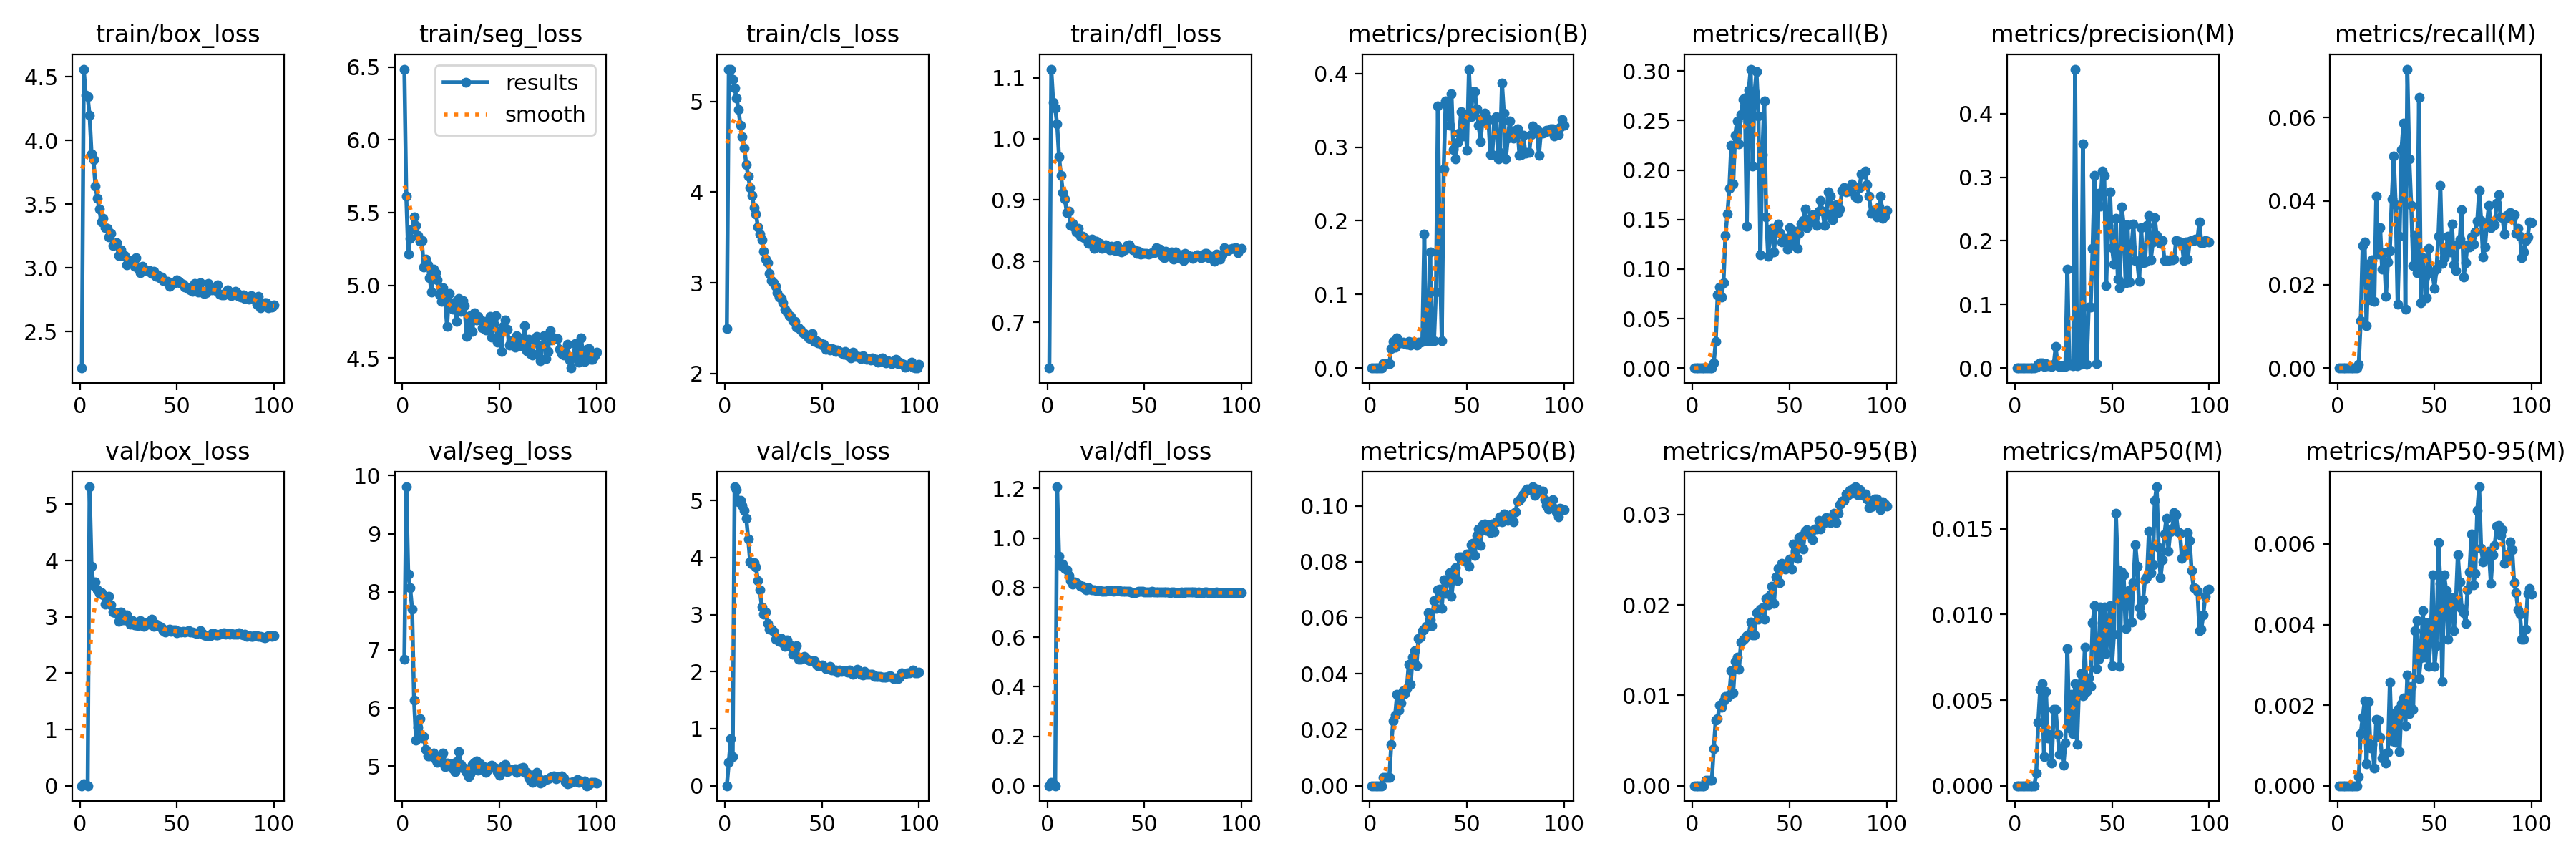

In [14]:
from IPython.display import Image
Image("/kaggle/working/results/train_1/results.png")

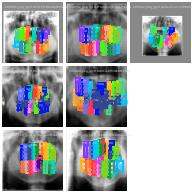

In [16]:
Image(filename='/kaggle/working/results/train_1/train_batch5852.jpg')

In [17]:
%ls /kaggle/working/results/train_1/weights

best.pt  last.pt


In [19]:
my_new_model = YOLO('/kaggle/working/results/train_1/weights/best.pt')